In [34]:
import pandas as pd
from openpyxl import load_workbook
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [35]:
df = pd.read_excel(r'datasetjadi_tanpadiskretisasi.xlsx')
df.head(2)

,No,lintang,bujur,lintangbujur,similarity radius,meninggal dunia,luka berat,luka ringan,kecelakaan berat,kecelakaan sedang,kecelakaan ringan,kondisi cahaya terang/jelas,kondisi cahaya redup/samar
0,1,-6.268772,107.122789,"-6.26877223,107.1227894",1,37,4,106,37,4,80,73,48
1,2,-6.258351,107.148406,"-6.258350876,107.1484059",2,4,0,15,4,0,12,8,8


In [36]:
df.columns =['no', 'lintang', 'bujur', 'lintangbujur', 'similarity_radius', 'frek_meninggal', 'frek_lukaberat', 'frek_lukaringan', 'frek_kecelakaanberat', 'frek_kecelakaansedang', 'frek_kecelakaanringan', 'kond_chy_terang', 'kond_chy_samar']
df

,no,lintang,bujur,lintangbujur,similarity_radius,frek_meninggal,frek_lukaberat,frek_lukaringan,frek_kecelakaanberat,frek_kecelakaansedang,frek_kecelakaanringan,kond_chy_terang,kond_chy_samar
0,1,-6.268772,107.122789,"-6.26877223,107.1227894",1,37,4,106,37,4,80,73,48
1,2,-6.258351,107.148406,"-6.258350876,107.1484059",2,4,0,15,4,0,12,8,8
2,3,-6.002558,107.024665,"-6.0025582,107.0246646",3,1,0,2,1,0,2,2,1
3,4,-6.184889,107.038933,"-6.184889133,107.0389326",4,8,1,34,7,1,30,24,14
4,5,-6.250638,107.158136,"-6.250637964,107.1581356",5,10,3,46,10,2,32,26,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,82,-6.336023,107.042119,"-6.33602292,107.0421194",372,0,1,9,0,1,8,5,4
82,83,-6.094315,107.178030,"-6.094315001,107.1780303",627,0,0,4,0,0,4,2,2
83,84,-6.415900,107.149459,"-6.4158997,107.1494594",654,0,0,2,0,0,2,0,2
84,85,-6.450674,107.101966,"-6.4506745,107.1019658",864,0,0,1,0,0,1,0,1


In [37]:
df.dtypes

no                         int64
lintang                  float64
bujur                    float64
lintangbujur              object
similarity_radius          int64
frek_meninggal             int64
frek_lukaberat             int64
frek_lukaringan            int64
frek_kecelakaanberat       int64
frek_kecelakaansedang      int64
frek_kecelakaanringan      int64
kond_chy_terang            int64
kond_chy_samar             int64
dtype: object

In [38]:
x = df[['frek_meninggal', 'frek_lukaberat', 'frek_lukaringan', 'frek_kecelakaanberat', 'frek_kecelakaansedang', 'frek_kecelakaanringan', 'kond_chy_terang', 'kond_chy_terang']].values
print(x)

[[ 37   4 106  37   4  80  73  73]
 [  4   0  15   4   0  12   8   8]
 [  1   0   2   1   0   2   2   2]
 [  8   1  34   7   1  30  24  24]
 [ 10   3  46  10   2  32  26  26]
 [ 25   1  73  24   1  49  40  40]
 [ 11   4  40  10   4  28  13  13]
 [  6   1  16   6   1  12  13  13]
 [  4   1   7   4   1   5   8   8]
 [ 14   6  81  13   5  67  47  47]
 [  2   0   8   2   0   7   7   7]
 [  4   0   7   3   0   4   1   1]
 [  2   2  14   2   0  11   7   7]
 [ 18   2  56  17   2  44  44  44]
 [  5   0   3   5   0   1   3   3]
 [ 12   4  41  11   3  31  28  28]
 [  9   0  29   9   0  23  20  20]
 [  0   0   1   0   0   1   0   0]
 [ 22   2  65  22   2  39  32  32]
 [  7   2  31   7   2  22  20  20]
 [  0   0   2   0   0   2   2   2]
 [  4   2  17   4   1  13   8   8]
 [  4   1   5   4   1   5   3   3]
 [  2   0   3   1   0   3   3   3]
 [ 11   1   7   9   1   7  11  11]
 [  5   0  19   5   0  10  10  10]
 [  1   0   4   1   0   2   0   0]
 [  3   0   9   3   0   6   4   4]
 [  0   3   1   0   

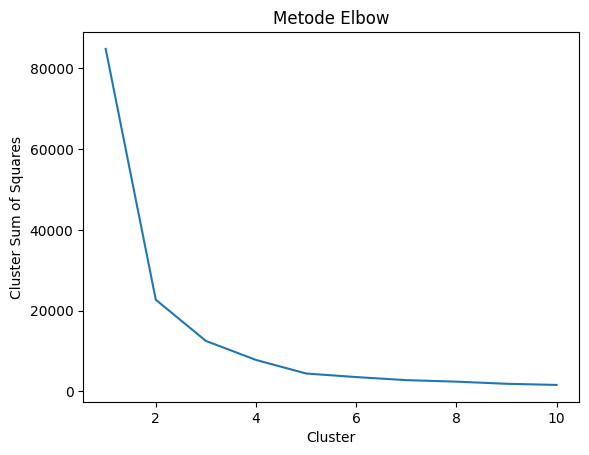

In [39]:
# elbow method (teknik untuk menentukan jumlah klaster yang optimal dalam k-means clustering.)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=700, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Cluster')
plt.ylabel('Cluster Sum of Squares')
plt.show()

In [40]:
#inisialisasi nilai cluster 3
kmeans = KMeans(n_clusters=3)

In [41]:
#melakukan clustering dengan data x
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [42]:
cluster = kmeans.cluster_centers_

In [43]:
#melihat pusat cluster 1-3
print(cluster)

[[21.16666667  3.33333333 75.         20.33333333  2.66666667 54.
  43.33333333 43.33333333]
 [ 1.57534247  0.32876712  5.09589041  1.46575342  0.24657534  3.89041096
   3.20547945  3.20547945]
 [ 8.85714286  2.14285714 35.14285714  8.42857143  1.71428571 26.57142857
  20.57142857 20.57142857]]


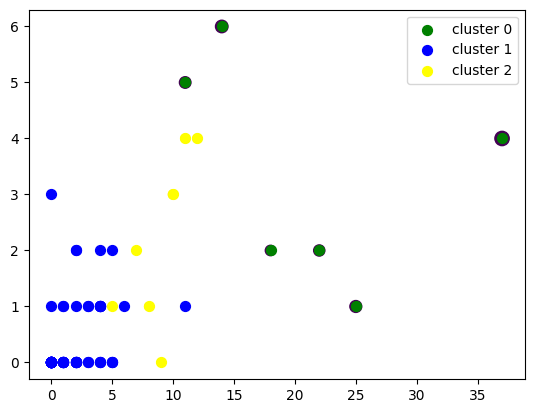

In [44]:
plt.scatter(x[:,0],x[:,1],x[:,2],c=kmeans.labels_,marker='o')
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
plt.scatter(x[labels ==0,0], x[labels == 0,1], s=50, color='green',label='cluster 0')
plt.scatter(x[labels ==1,0], x[labels == 1,1], s=50, color='blue',label='cluster 1')
plt.scatter(x[labels ==2,0], x[labels == 2,1], s=50, color='yellow',label='cluster 2')
plt.legend()
plt.show()

In [45]:
y_predicted = kmeans.fit_predict(df[['frek_meninggal', 'frek_lukaberat', 'frek_lukaringan', 'frek_kecelakaanberat', 'frek_kecelakaansedang', 'frek_kecelakaanringan', 'kond_chy_terang', 'kond_chy_terang']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 0, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [46]:
df['cluster'] = labels
df['cluster'].value_counts()

cluster
1    73
2     7
0     6
Name: count, dtype: int64

In [47]:
df['cluster'] = y_predicted
df

,no,lintang,bujur,lintangbujur,similarity_radius,frek_meninggal,frek_lukaberat,frek_lukaringan,frek_kecelakaanberat,frek_kecelakaansedang,frek_kecelakaanringan,kond_chy_terang,kond_chy_samar,cluster
0,1,-6.268772,107.122789,"-6.26877223,107.1227894",1,37,4,106,37,4,80,73,48,1
1,2,-6.258351,107.148406,"-6.258350876,107.1484059",2,4,0,15,4,0,12,8,8,0
2,3,-6.002558,107.024665,"-6.0025582,107.0246646",3,1,0,2,1,0,2,2,1,0
3,4,-6.184889,107.038933,"-6.184889133,107.0389326",4,8,1,34,7,1,30,24,14,2
4,5,-6.250638,107.158136,"-6.250637964,107.1581356",5,10,3,46,10,2,32,26,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,82,-6.336023,107.042119,"-6.33602292,107.0421194",372,0,1,9,0,1,8,5,4,0
82,83,-6.094315,107.178030,"-6.094315001,107.1780303",627,0,0,4,0,0,4,2,2,0
83,84,-6.415900,107.149459,"-6.4158997,107.1494594",654,0,0,2,0,0,2,0,2,0
84,85,-6.450674,107.101966,"-6.4506745,107.1019658",864,0,0,1,0,0,1,0,1,0


In [48]:
datalist = df[['lintang', 'bujur', 'cluster']].values.tolist()
datalist

[[-6.268772230418181, 107.1227893583011, 1.0],
 [-6.258350876181031, 107.1484059134918, 0.0],
 [-6.002558199999999, 107.0246646, 0.0],
 [-6.184889132645838, 107.0389326046223, 2.0],
 [-6.250637964155654, 107.1581355788274, 2.0],
 [-6.271105968903374, 107.1845016549758, 1.0],
 [-6.283834229460887, 107.0923745513296, 2.0],
 [-6.346226238227998, 107.2116569339032, 0.0],
 [-6.094134044715597, 107.0771754997354, 0.0],
 [-6.244997829373455, 107.0635924203137, 1.0],
 [-6.234959230715437, 107.1124339339833, 0.0],
 [-6.267359546011376, 107.0802231628367, 0.0],
 [-6.285487908618935, 107.1588979818858, 0.0],
 [-6.341818635353964, 107.1318796917422, 1.0],
 [-6.004976904069567, 107.090044808581, 0.0],
 [-6.271357769651118, 107.2672272576122, 2.0],
 [-6.217338678635923, 107.1599367561082, 2.0],
 [-6.272606974899375, 107.0693267432627, 0.0],
 [-6.306922762892115, 107.14799274882, 1.0],
 [-6.330198829675304, 107.1742405153987, 2.0],
 [-6.35761165521876, 107.1810322311176, 0.0],
 [-6.286347721477685, 1

In [49]:
import folium
data_maps = folium.Map(location=[-6.251358618,107.0877499], zoom_start=11)
fg = folium.FeatureGroup(name='data_maps')

hitungBerat = 0
for i in datalist:
  fg.add_child(folium.Marker(location=[i[0], i[1]], popup=i[2], icon=folium.Icon(color='red')))

data_maps.add_child(fg)


In [50]:
import geopy
import geopy.distance
import math
import folium

def get_rectangle_bounds(coordinates, width, length):
    start = geopy.Point(coordinates)
    hypotenuse = math.hypot(width/1000, length/1000)

    # Edit used wrong formula to convert radians to degrees, use math builtin function
    northeast_angle = 0 - math.degrees(math.atan(width/length))
    southwest_angle = 180 - math.degrees(math.atan(width/length))

    d = geopy.distance.distance(kilometers=hypotenuse/2)
    northeast = d.destination(point=start, bearing=northeast_angle)
    southwest = d.destination(point=start, bearing=southwest_angle)
    bounds = []
    for point in [northeast, southwest]:
        coords = (point.latitude, point.longitude)
        bounds.append(coords)

    return bounds

In [55]:
datalist

[[-6.268772230418181, 107.1227893583011, 1.0],
 [-6.258350876181031, 107.1484059134918, 0.0],
 [-6.002558199999999, 107.0246646, 0.0],
 [-6.184889132645838, 107.0389326046223, 2.0],
 [-6.250637964155654, 107.1581355788274, 2.0],
 [-6.271105968903374, 107.1845016549758, 1.0],
 [-6.283834229460887, 107.0923745513296, 2.0],
 [-6.346226238227998, 107.2116569339032, 0.0],
 [-6.094134044715597, 107.0771754997354, 0.0],
 [-6.244997829373455, 107.0635924203137, 1.0],
 [-6.234959230715437, 107.1124339339833, 0.0],
 [-6.267359546011376, 107.0802231628367, 0.0],
 [-6.285487908618935, 107.1588979818858, 0.0],
 [-6.341818635353964, 107.1318796917422, 1.0],
 [-6.004976904069567, 107.090044808581, 0.0],
 [-6.271357769651118, 107.2672272576122, 2.0],
 [-6.217338678635923, 107.1599367561082, 2.0],
 [-6.272606974899375, 107.0693267432627, 0.0],
 [-6.306922762892115, 107.14799274882, 1.0],
 [-6.330198829675304, 107.1742405153987, 2.0],
 [-6.35761165521876, 107.1810322311176, 0.0],
 [-6.286347721477685, 1

In [75]:
from geopy.geocoders import Nominatim

start_coords = [-6.251358618,107.0877499]
length = 3000 #in meters
width = 3000
bearing = 45 #degrees

m_campur = folium.Map(start_coords, zoom_start=10)
geolocator = Nominatim(user_agent="project_lakalantas")

for x in datalist:
  xy = []
  xy.append(x[0])
  xy.append(x[1])
  warna = None
  if x[2] == 0:
    warna = "green"
  elif x[2] == 1:
    warna = "red"
  else:
    warna = "yellow"
  bounds = get_rectangle_bounds(tuple(xy),width, length )
  location = geolocator.reverse(xy)
  folium.Rectangle(bounds=bounds,
                  fill=True,
                  color=warna,
                  tooltip=location.address,
                  fill_opacity = 0.5
                ).add_to(m_campur)

m_campur


In [61]:
datalisthijau = datalist
datalistmerah = datalist
datalistkuning = datalist

In [62]:
# prompt: analisa data di dalam variable datalisthijau, hapus list yang setiap listnya pada indeks ke 3 memiliki nilai 1 dan 2

datalisthijau_filtered = [lst for lst in datalisthijau if lst[2] == 0]
datalistmerah_filtered = [lst for lst in datalistmerah if lst[2] == 1]
datalistkuning_filtered = [lst for lst in datalistkuning if lst[2] == 2]


In [70]:
datalistmerah_filtered

[[-6.268772230418181, 107.1227893583011, 1.0],
 [-6.271105968903374, 107.1845016549758, 1.0],
 [-6.244997829373455, 107.0635924203137, 1.0],
 [-6.341818635353964, 107.1318796917422, 1.0],
 [-6.306922762892115, 107.14799274882, 1.0],
 [-6.275287799858352, 107.0435050027699, 1.0]]

In [77]:
from geopy.geocoders import Nominatim

start_coords = [-6.251358618,107.0877499]
length = 3000 #in meters
width = 3000
bearing = 45 #degrees

m_hijau = folium.Map(start_coords, zoom_start=10)
geolocator = Nominatim(user_agent="project_lakalantas")

for x in datalisthijau_filtered:
  if x[2] == 0:
    xy = []
    xy.append(x[0])
    xy.append(x[1])
    warna = "green"
    bounds = get_rectangle_bounds(tuple(xy),width, length )
    location = geolocator.reverse(xy)
    folium.Rectangle(bounds=bounds,
                    fill=True,
                    color=warna,
                    tooltip=location.address,
                    fill_opacity = 0.5
                  ).add_to(m_hijau)

m_hijau


In [78]:
from geopy.geocoders import Nominatim

start_coords = [-6.251358618,107.0877499]
length = 3000 #in meters
width = 3000
bearing = 45 #degrees

m_kuning = folium.Map(start_coords, zoom_start=10)
geolocator = Nominatim(user_agent="project_lakalantas")

for x in datalistkuning_filtered:
  if x[2] == 2:
    xy = []
    xy.append(x[0])
    xy.append(x[1])
    warna = "yellow"
    bounds = get_rectangle_bounds(tuple(xy),width, length )
    location = geolocator.reverse(xy)
    folium.Rectangle(bounds=bounds,
                    fill=True,
                    color=warna,
                    tooltip=location.address,
                    fill_opacity = 0.5
                  ).add_to(m_kuning)

m_kuning


In [79]:
from geopy.geocoders import Nominatim

start_coords = [-6.251358618,107.0877499]
length = 3000 #in meters
width = 3000
bearing = 45 #degrees

m_merah = folium.Map(start_coords, zoom_start=10)
geolocator = Nominatim(user_agent="project_lakalantas")

for x in datalistmerah_filtered:
  if x[2] == 1:
    xy = []
    xy.append(x[0])
    xy.append(x[1])
    warna = "red"
    bounds = get_rectangle_bounds(tuple(xy),width, length )
    location = geolocator.reverse(xy)
    folium.Rectangle(bounds=bounds,
                    fill=True,
                    color=warna,
                    tooltip=location.address,
                    fill_opacity = 0.5
                  ).add_to(m_merah)

m_merah


### DOWNLOAD FILE UNTUK LAKUKAN ANALISA HASIL CLUSTERING DAN
TENTUKAN LEVEL DAERAH DENGAN KECELAKAAN RINGAN, SEDANG DAN BERAT BERDASARKAN HASIL CLUSTERNYA

### MENENTUKAN HASIL CLUSTER:
### *   Cluster 0 = Rendah
### *   Cluster 1 = Tinggi
### *   Cluster 2 = Sedang

In [74]:
from google.colab import files
df.to_excel('datasetclustering.xlsx')
files.download('datasetclustering.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Save dan download Maps sebagai HTML agar bisa dijalankan di browser

In [80]:
# prompt: download cell no 51 dengan hasil peta warna merah, kuning dan hijau ke dalam bentuk html

# Assuming 'm' is the folium map object you want to save
m_campur.save('map_campur.html')
m_hijau.save('map_hijau.html')
m_kuning.save('map_kuning.html')
m_merah.save('map_merah.html')
files.download('map_campur.html')
files.download('map_hijau.html')
files.download('map_kuning.html')
files.download('map_merah.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>